# Forecasts and Predictions Project

**Project description:**

This project includes an analysis of the data from Model Fitness Gym customer profilies.The gym is seeking to fight churn and my goal is to find the best retention stragtegy. 

The dataset includes the following data:
Churn, Gender, Near_location, Partner, Promo friends, Phone, Age, Lifetime, Contract period, Month till end of contract, Group visits, Avg class frequency total, Avg class frequency current month, avg additional charges total. 

In this project I preprocessed the data, built two models to predict user churn (Logistic regression & Random forest) and selected the better one for this prediction, I used KMeans clustering in order to identify client groups and finally, outlined my conclusions and recommendations for Model Fitness Gym clients interaction and retention strategy. 

## Step 1. Data Overview

In [1]:
#importing libraries 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
#reading the data
try:
    gym_data = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    print('Something is wrong with the gym_churn_us file')

In [3]:
# Looking at the dataset: 
display(gym_data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# does it contain any missing features? 
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Out dataset includes 4000 rows and 14 columns (13 features). All the data is numerical and there are no missing values.

## Step 2. Carry out exploratory data analysis (EDA)

In [5]:
# Study the mean values and standard deviation (use the describe() method)
display(gym_data.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


it looks like the "avg_additional_charges_in_total" have a high std of ~96. other than that, the rest of the features have low std.


**Look at the mean feature values in two groups: 
for those who left (churn) and for those who stayed**

In [6]:
# calculating the mean for both groups
gym_grouped = gym_data.groupby(by ='Churn').mean()
display(gym_grouped.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We can immediately see a few differences between the groups when looking at the mean feature values. For instance, for the group that lef we see that less of them were part of a partner program or a friends promo, their contract period was shorter on average, they atended less group visits, they had less time left on their contract and their avg class frequency was lower in general and it also decreased in the last month as oppose to those who stayed which their avg class frequency did not change between the total to the last month. 

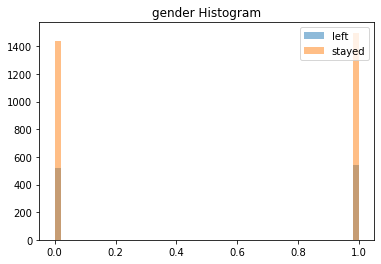

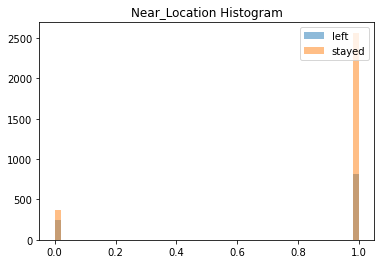

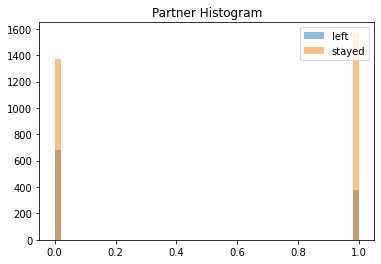

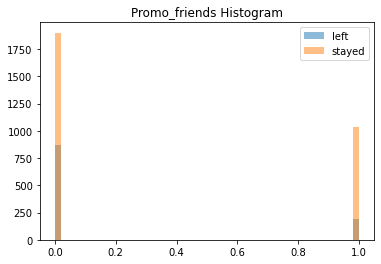

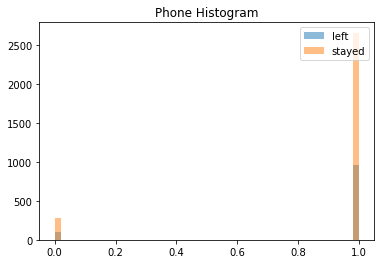

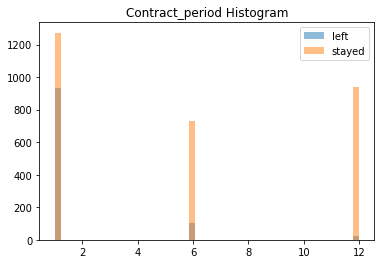

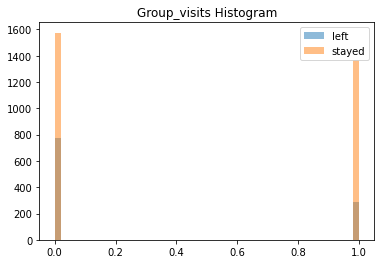

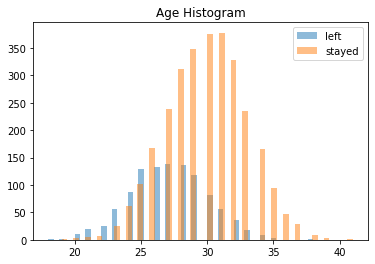

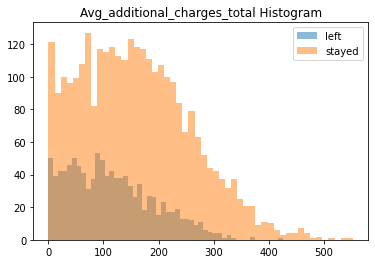

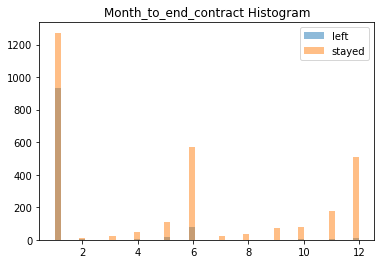

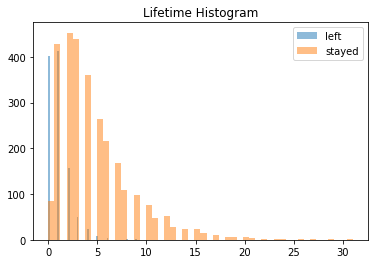

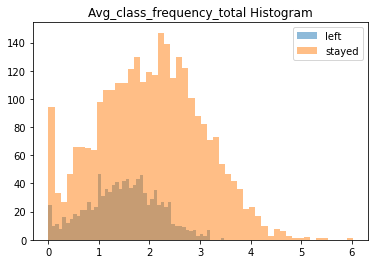

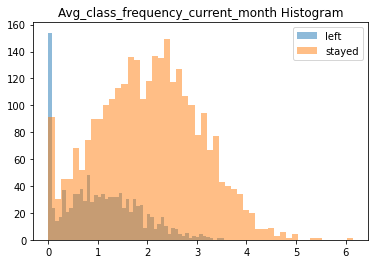

In [7]:
#creating a loop to display all histograms for those who left and those who stayed
for col in gym_data.drop('Churn', axis=1).columns:
    pyplot.hist(gym_data[gym_data['Churn']==1][col], bins = 50, alpha=0.5, label='left')
    pyplot.hist(gym_data[gym_data['Churn']==0][col], bins = 50, alpha=0.5, label='stayed')
    pyplot.legend(loc='upper right')
    pyplot.title('{} Histogram'.format(col))
    pyplot.show()

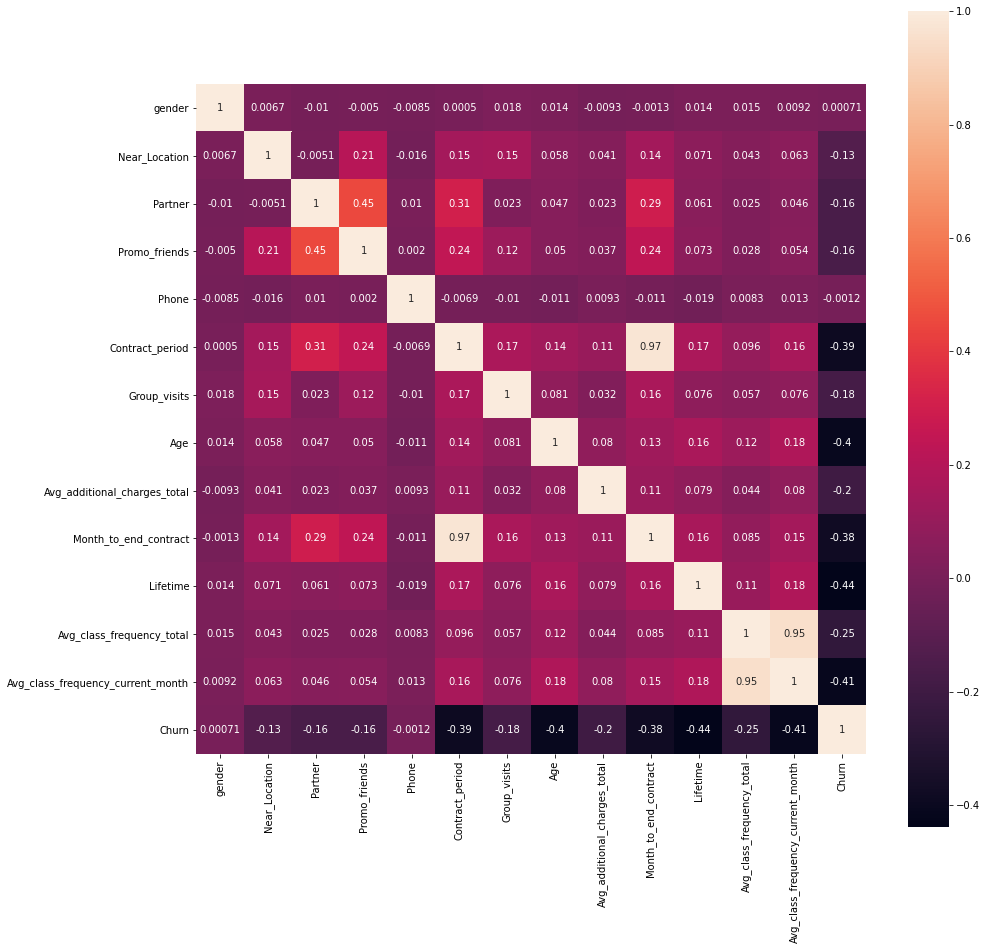

In [8]:
# Build a correlation matrix and display it.
corr_m = gym_data.corr() 
fig, ax = plt.subplots(figsize= (15,15))

# heatmap for the correlation matrix
sns.heatmap(corr_m, annot = True, square = True)
ax.set_ylim(14, 0)
plt.show()

We don't clearly see a high correlation between any of the features to the Churn. 
There is a strong correlation between the avg class frequency in the current month to the avg in total, which makes sense since these features are related. 

## Step 3. Build a model to predict user churn

**Build a binary classification model for customers where the target feature is the user's leaving next month**

In [9]:
# Define the features and target value
X = gym_data.drop(['Churn'], axis = 1)
y = gym_data['Churn']

In [10]:
# Divide the data into train and validation sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
# Training the model on the train set with two methods: Logistic regression and Random forest Classifier
# Logistic Regression
l_model = LogisticRegression(random_state = 0)
l_model.fit(X_train, y_train)
l_predictions = l_model.predict(X_test)

print('Metric for Logistic Regression - Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, l_predictions), 
                                          precision_score(y_test, l_predictions),
                                                                recall_score(y_test, l_predictions)))

Metric for Logistic Regression - Accuracy:0.91 Precision:0.82 Recall:0.80


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Random Forest Classifier
r_model = RandomForestClassifier(random_state = 0)
r_model.fit(X_train, y_train)
r_predictions = r_model.predict(X_test)

print('Metric for Random Forest Classifier - Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, r_predictions), 
                                          precision_score(y_test, r_predictions),
                                                                recall_score(y_test, r_predictions)))

Metric for Random Forest Classifier - Accuracy:0.92 Precision:0.84 Recall:0.82


We can see that for all Metrics (Accuracy, Precision and Recall) the Random Forest Classifier is better.

## Step 4. Create user clusters

In [13]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(gym_data.drop(columns = ['Churn']))

In [14]:
#link objects
linked = linkage(x_sc, method = 'ward') 

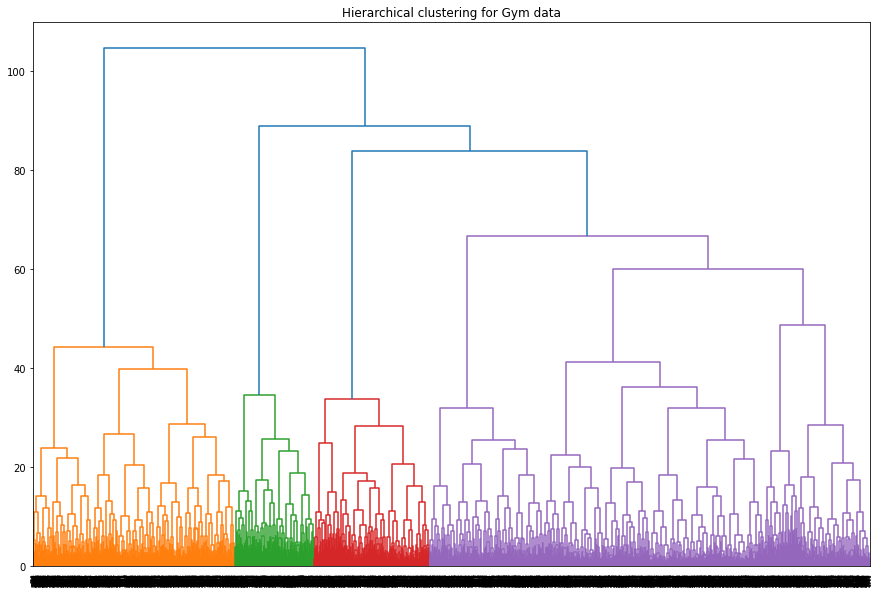

In [15]:
# Dendrogram visualization
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Gym data')
plt.show() 

In [16]:
# Train the clustering model with the K-means algorithm and predict customer clusters.
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations 
labels = km.fit_predict(x_sc)
#saving the cluster labels in our dataset
gym_data['cluster'] = labels
display(gym_data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


In [17]:
# Look at the mean feature values for clusters
clusters_grouped = gym_data.groupby('cluster').mean()
display(clusters_grouped.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.492777,0.948636,0.812199,0.998395,1.0,3.017657,0.436597,29.038523,141.395773,2.826645,3.691814,1.701307,1.591963,0.263242
1,0.558926,0.847141,0.284714,0.074679,1.0,2.680280,0.446908,30.042007,160.953390,2.478413,4.869312,2.814172,2.806979,0.079347
2,0.488994,0.725629,0.297170,0.010220,1.0,1.944969,0.279088,28.162736,129.942104,1.852201,2.248428,1.258148,1.008993,0.555818
3,0.500000,0.937355,0.738979,0.483759,1.0,11.867749,0.549884,29.893271,163.338255,10.819026,4.692575,2.005023,1.997614,0.022042
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


We can see that the average churn for cluster 4 is the highest, this is the cluster of clients that are in the highest probability of leaving the gym, they have the lowest avg class frequency in the current month (and it dropped from their total avg), they have on average less than 2 months left in their contract, they joined the gym in the last 2 years, they are most likley not part of a partner program or on friends promo terms and their contract period was for ~ 2 months so they were not planning to engage for a long period in advance. 

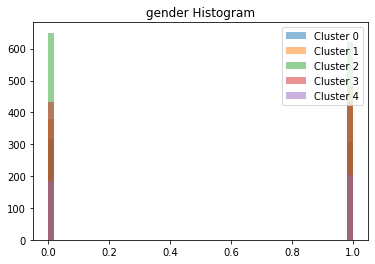

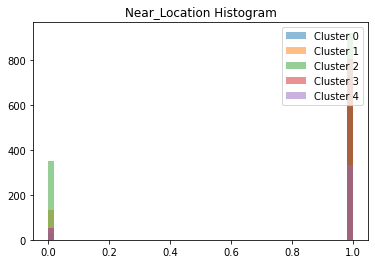

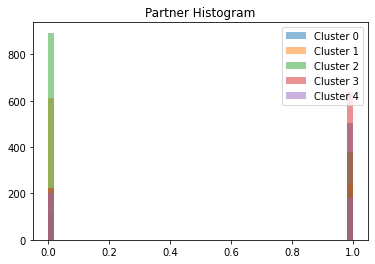

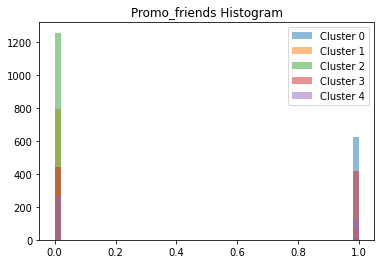

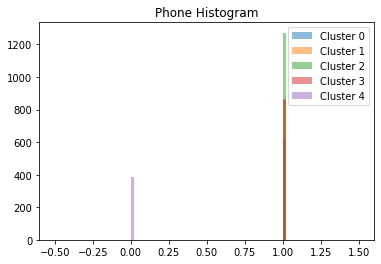

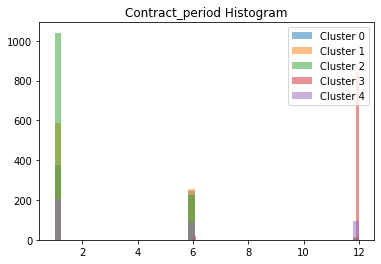

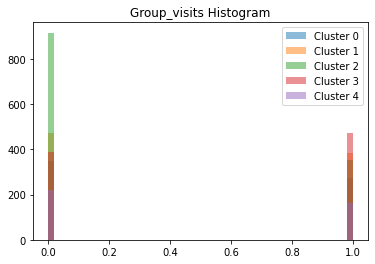

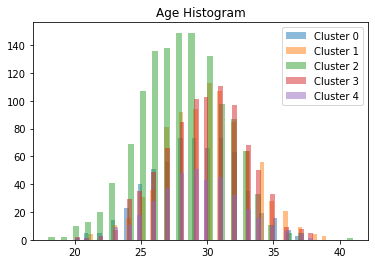

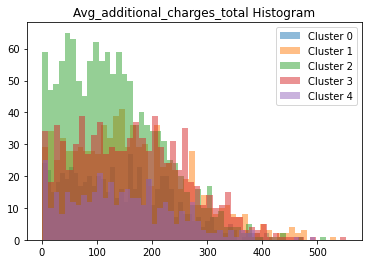

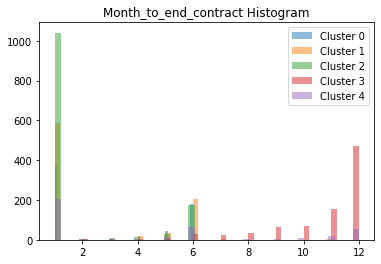

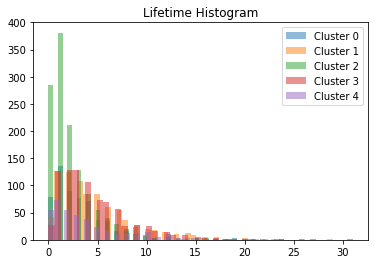

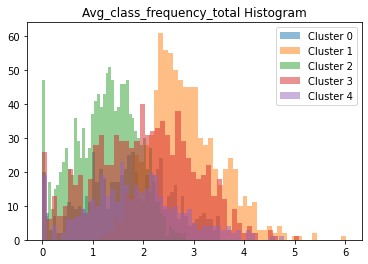

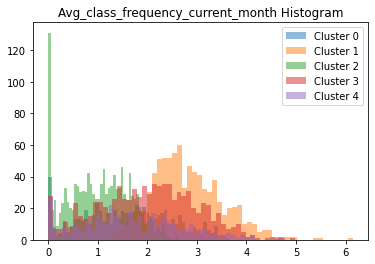

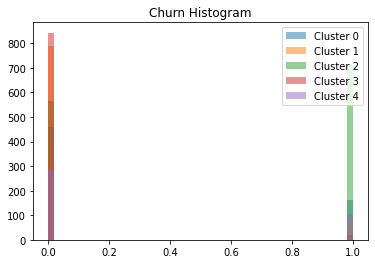

In [18]:
# Plot distributions of features for the clusters
#creating a loop to display all histograms for all clusters
for col in gym_data.drop(['cluster'], axis=1).columns:
    pyplot.hist(gym_data[gym_data['cluster']==0][col], bins = 50, alpha=0.5, label='Cluster 0')
    pyplot.hist(gym_data[gym_data['cluster']==1][col], bins = 50, alpha=0.5, label='Cluster 1')
    pyplot.hist(gym_data[gym_data['cluster']==2][col], bins = 50, alpha=0.5, label='Cluster 2')
    pyplot.hist(gym_data[gym_data['cluster']==3][col], bins = 50, alpha=0.5, label='Cluster 3')
    pyplot.hist(gym_data[gym_data['cluster']==4][col], bins = 50, alpha=0.5, label='Cluster 4')
    pyplot.legend(loc='upper right')
    pyplot.title('{} Histogram'.format(col))
    pyplot.show()

In [19]:
# Calculate the churn rate for each cluster
clusters_churn = gym_data.groupby('cluster').agg({'Churn':'sum', 'Avg_additional_charges_total':'count'})
clusters_churn.rename(columns = {'Churn':'left', 'Avg_additional_charges_total':'total'}, inplace = True)
clusters_churn['churn_rate'] = clusters_churn['left'] / clusters_churn['total']
display(clusters_churn)

,left,total,churn_rate
cluster,,,
0,164,623,0.263242
1,68,857,0.079347
2,707,1272,0.555818
3,19,862,0.022042
4,103,386,0.266839


We could say that the groups differ in their churn rate, while cluster 3 and cluster 4 are prone to leaving.

## Step 5: Conclusions and basic recommendations on working with customers

In this project I investigated the data of Model fitness gym clients in order to develop a customer interaction strategy based on analytical data. 

I identified target groups as the groups more likely to leave the gym, these groups should be interacted more often in order to keep them with us. These groups can be recognized using the following parameters:
1. Their contract period is short (~2 months)
2. They don't attend many group classes
3. They recently joined (in the last 2 years) 
4. They don't show up in the gym much (~1.5 times a week on average) 
5. In the last month they should up less than usual (~1 time a week on average)

My suggestions in order to cut churn would be to identify these clients by following the clients data and offer them specific promos, encourage them to join group classes (sometime it help to find friends in the gym, they motivate you to keep practice).